In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, cohen_kappa_score
from xgboost import XGBRegressor
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Check Data Dictionary for fields for selected from EDA performed here - 

In [3]:
data_dict = pd.read_csv("/kaggle/input/child-mind-institute-problematic-internet-use/data_dictionary.csv")
data_dict

,Instrument,Field,Description,Type,Values,Value Labels
0,Identifier,id,Participant's ID,str,NaN,NaN
1,Demographics,Basic_Demos-Enroll_Season,Season of enrollment,str,"Spring, Summer, Fall, Winter",NaN
2,Demographics,Basic_Demos-Age,Age of participant,float,NaN,NaN
3,Demographics,Basic_Demos-Sex,Sex of participant,categorical int,"0,1","0=Male, 1=Female"
4,Children's Global Assessment Scale,CGAS-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN
...,...,...,...,...,...,...
76,Sleep Disturbance Scale,SDS-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN
77,Sleep Disturbance Scale,SDS-SDS_Total_Raw,Total Raw Score,int,NaN,NaN
78,Sleep Disturbance Scale,SDS-SDS_Total_T,Total T-Score,int,NaN,NaN
79,Internet Use,PreInt_EduHx-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN


In [4]:
features = ['BIA-BIA_Frame_num', 'Physical-HeartRate', 'FGC-FGC_SRL', 'BIA-BIA_BMC', 'FGC-FGC_TL', 'PreInt_EduHx-Season', 'Physical-Season', 'Physical-Diastolic_BP', 'FGC-FGC_PU', 'FGC-FGC_CU', 'Physical-Height', 'CGAS-Season',  'Physical-Systolic_BP', 'PAQ_C-Season', 'PAQ_C-PAQ_C_Total', 'Physical-Weight', 'FGC-FGC_SRR', 'BIA-BIA_Activity_Level_num', 'SDS-SDS_Total_Raw', 'BIA-BIA_FFMI', 'SDS-Season', 'Basic_Demos-Sex', 'Basic_Demos-Age', 'Physical-BMI', 'FGC-Season', 'BIA-Season', 'BIA-BIA_FMI', 'PreInt_EduHx-computerinternet_hoursday', 'CGAS-CGAS_Score']
data_dict[data_dict['Field'].isin(features)][['Field', 'Description','Type', 'Values']]

,Field,Description,Type,Values
2,Basic_Demos-Age,Age of participant,float,NaN
3,Basic_Demos-Sex,Sex of participant,categorical int,"0,1"
4,CGAS-Season,Season of participation,str,"Spring, Summer, Fall, Winter"
5,CGAS-CGAS_Score,Children's Global Assessment Scale Score,int,NaN
6,Physical-Season,Season of participation,str,"Spring, Summer, Fall, Winter"
7,Physical-BMI,Body Mass Index (kg/m^2),float,NaN
8,Physical-Height,Height (in),float,NaN
9,Physical-Weight,Weight (lbs),float,NaN
11,Physical-Diastolic_BP,Diastolic BP (mmHg),int,NaN
12,Physical-HeartRate,Heart rate (beats/min),int,NaN


In [5]:
data_dict[data_dict['Field'].isin(features)][['Field', 'Description','Type', 'Values']]

,Field,Description,Type,Values
2,Basic_Demos-Age,Age of participant,float,NaN
3,Basic_Demos-Sex,Sex of participant,categorical int,"0,1"
4,CGAS-Season,Season of participation,str,"Spring, Summer, Fall, Winter"
5,CGAS-CGAS_Score,Children's Global Assessment Scale Score,int,NaN
6,Physical-Season,Season of participation,str,"Spring, Summer, Fall, Winter"
7,Physical-BMI,Body Mass Index (kg/m^2),float,NaN
8,Physical-Height,Height (in),float,NaN
9,Physical-Weight,Weight (lbs),float,NaN
11,Physical-Diastolic_BP,Diastolic BP (mmHg),int,NaN
12,Physical-HeartRate,Heart rate (beats/min),int,NaN


In [6]:
old_features = data_dict[(data_dict['Type'].isin(['int','float', 'categorical int'])) & ~(data_dict['Description'].str.contains('Score')) & ~(data_dict['Field'].str.contains('PCIAT'))]['Field']
old_features

2                            Basic_Demos-Age
3                            Basic_Demos-Sex
7                               Physical-BMI
8                            Physical-Height
9                            Physical-Weight
10              Physical-Waist_Circumference
11                     Physical-Diastolic_BP
12                        Physical-HeartRate
13                      Physical-Systolic_BP
15               Fitness_Endurance-Max_Stage
16               Fitness_Endurance-Time_Mins
17                Fitness_Endurance-Time_Sec
19                                FGC-FGC_CU
20                           FGC-FGC_CU_Zone
21                              FGC-FGC_GSND
22                         FGC-FGC_GSND_Zone
23                               FGC-FGC_GSD
24                          FGC-FGC_GSD_Zone
25                                FGC-FGC_PU
26                           FGC-FGC_PU_Zone
27                               FGC-FGC_SRL
28                          FGC-FGC_SRL_Zone
29        

In [7]:
categorical_features = data_dict[(data_dict['Field'].isin(features)) & (data_dict['Type'] == 'str')]['Field'].tolist()
categorical_features

['CGAS-Season',
 'Physical-Season',
 'FGC-Season',
 'BIA-Season',
 'PAQ_C-Season',
 'SDS-Season',
 'PreInt_EduHx-Season']

In [8]:
features = [feature for feature in features if feature not in categorical_features]
features

['BIA-BIA_Frame_num',
 'Physical-HeartRate',
 'FGC-FGC_SRL',
 'BIA-BIA_BMC',
 'FGC-FGC_TL',
 'Physical-Diastolic_BP',
 'FGC-FGC_PU',
 'FGC-FGC_CU',
 'Physical-Height',
 'Physical-Systolic_BP',
 'PAQ_C-PAQ_C_Total',
 'Physical-Weight',
 'FGC-FGC_SRR',
 'BIA-BIA_Activity_Level_num',
 'SDS-SDS_Total_Raw',
 'BIA-BIA_FFMI',
 'Basic_Demos-Sex',
 'Basic_Demos-Age',
 'Physical-BMI',
 'BIA-BIA_FMI',
 'PreInt_EduHx-computerinternet_hoursday',
 'CGAS-CGAS_Score']

In [9]:
seasons = ['Spring', 'Summer', 'Fall', 'Winter']
features_with_season = [*features]
for cf in categorical_features:
    for season in seasons:
        features_with_season.append(f"{cf}_{season}")

features_with_season

['BIA-BIA_Frame_num',
 'Physical-HeartRate',
 'FGC-FGC_SRL',
 'BIA-BIA_BMC',
 'FGC-FGC_TL',
 'Physical-Diastolic_BP',
 'FGC-FGC_PU',
 'FGC-FGC_CU',
 'Physical-Height',
 'Physical-Systolic_BP',
 'PAQ_C-PAQ_C_Total',
 'Physical-Weight',
 'FGC-FGC_SRR',
 'BIA-BIA_Activity_Level_num',
 'SDS-SDS_Total_Raw',
 'BIA-BIA_FFMI',
 'Basic_Demos-Sex',
 'Basic_Demos-Age',
 'Physical-BMI',
 'BIA-BIA_FMI',
 'PreInt_EduHx-computerinternet_hoursday',
 'CGAS-CGAS_Score',
 'CGAS-Season_Spring',
 'CGAS-Season_Summer',
 'CGAS-Season_Fall',
 'CGAS-Season_Winter',
 'Physical-Season_Spring',
 'Physical-Season_Summer',
 'Physical-Season_Fall',
 'Physical-Season_Winter',
 'FGC-Season_Spring',
 'FGC-Season_Summer',
 'FGC-Season_Fall',
 'FGC-Season_Winter',
 'BIA-Season_Spring',
 'BIA-Season_Summer',
 'BIA-Season_Fall',
 'BIA-Season_Winter',
 'PAQ_C-Season_Spring',
 'PAQ_C-Season_Summer',
 'PAQ_C-Season_Fall',
 'PAQ_C-Season_Winter',
 'SDS-Season_Spring',
 'SDS-Season_Summer',
 'SDS-Season_Fall',
 'SDS-Season_Wint

In [10]:
all_features = list(set([*features_with_season,*old_features]))
len(all_features), len(features_with_season), len(old_features)

(74, 50, 43)

In [11]:
target = 'PCIAT-PCIAT_Total'

# Helper Functions

In [12]:
def convert_PCIAT_to_SII(pciat):
    #sii - PCIAT-PCIAT_Total
    # 0 - 0 to 30 
    # 1 - 31 to 49
    # 2 - 50 to 79
    # 3 - 80 to 100
    if pciat >= 80:
        return 3
    elif pciat >= 50:
        return 2
    elif pciat >= 31:
        return 1
    else:
        return 0

In [13]:
def calculate_scores(y, pred, scores, key):
    score = {}
    sii_test = [convert_PCIAT_to_SII(x) for x in y]
    sii_pred = [convert_PCIAT_to_SII(x) for x in pred]
    score['Metric_Name'] = f"{key}_mse"
    score['Value'] = mean_squared_error(sii_test,sii_pred)
    scores.append(score)
    mae_score = {}
    mae_score['Metric_Name'] = f"{key}_mae"
    mae_score['Value'] = mean_absolute_error(sii_test,sii_pred)
    scores.append(mae_score)
    kappa_score = {}
    kappa_score['Metric_Name'] = f"{key}_kappa"
    kappa_score['Value'] = cohen_kappa_score(sii_test, sii_pred, weights='quadratic')
    scores.append(kappa_score)
    return scores

# Check training dataset features

In [14]:
df = pd.read_csv("/kaggle/input/child-mind-institute-problematic-internet-use/train.csv")
df

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,...,1.0,1.0,0.0,32.0,Winter,35.0,50.0,Fall,1.0,1.0
3956,ffa9794a,Winter,10,0,NaN,NaN,Spring,18.764678,53.5,76.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter,0.0,NaN
3957,ffcd4dbd,Fall,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,...,1.0,0.0,1.0,31.0,Winter,56.0,77.0,Fall,0.0,1.0
3958,ffed1dd5,Spring,13,0,Spring,70.0,Winter,12.235895,70.7,87.0,...,1.0,1.0,1.0,19.0,Spring,33.0,47.0,Spring,1.0,0.0


In [15]:
#filter na target rows
df_train = df[df[target].notna()]
df_train

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
5,001f3379,Spring,13,1,Winter,50.0,Summer,22.279952,59.5,112.2,...,1.0,2.0,1.0,34.0,Summer,40.0,56.0,Spring,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,ff6c2bb8,Fall,8,0,NaN,NaN,Fall,17.139810,52.5,67.2,...,2.0,2.0,1.0,22.0,Fall,41.0,58.0,Fall,2.0,0.0
3954,ff759544,Summer,7,1,NaN,NaN,Summer,13.927006,48.5,46.6,...,3.0,3.0,0.0,33.0,Summer,48.0,67.0,Summer,0.0,1.0
3955,ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,...,1.0,1.0,0.0,32.0,Winter,35.0,50.0,Fall,1.0,1.0
3957,ffcd4dbd,Fall,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,...,1.0,0.0,1.0,31.0,Winter,56.0,77.0,Fall,0.0,1.0


In [16]:
df_train[categorical_features]

,CGAS-Season,Physical-Season,FGC-Season,BIA-Season,PAQ_C-Season,SDS-Season,PreInt_EduHx-Season
0,Winter,Fall,Fall,Fall,NaN,NaN,Fall
1,NaN,Fall,Fall,Winter,Fall,Fall,Summer
2,Fall,Fall,Fall,NaN,Summer,Fall,Summer
3,Fall,Summer,Summer,Summer,Winter,Summer,Winter
5,Winter,Summer,Summer,Summer,Spring,Summer,Spring
...,...,...,...,...,...,...,...
3953,NaN,Fall,Fall,Fall,Fall,Fall,Fall
3954,NaN,Summer,Summer,Fall,NaN,Summer,Summer
3955,Spring,Fall,Fall,Fall,Winter,Winter,Fall
3957,Spring,Winter,Winter,Winter,Winter,Winter,Fall


In [17]:
df_train = pd.get_dummies(df_train, columns=categorical_features, dtype='int')
df_train

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,...,PAQ_C-Season_Summer,PAQ_C-Season_Winter,SDS-Season_Fall,SDS-Season_Spring,SDS-Season_Summer,SDS-Season_Winter,PreInt_EduHx-Season_Fall,PreInt_EduHx-Season_Spring,PreInt_EduHx-Season_Summer,PreInt_EduHx-Season_Winter
0,00008ff9,Fall,5,0,51.0,16.877316,46.0,50.8,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
1,000fd460,Summer,9,0,NaN,14.035590,48.0,46.0,22.0,75.0,...,0,0,1,0,0,0,0,0,1,0
2,00105258,Summer,10,1,71.0,16.648696,56.5,75.6,NaN,65.0,...,1,0,1,0,0,0,0,0,1,0
3,00115b9f,Winter,9,0,71.0,18.292347,56.0,81.6,NaN,60.0,...,0,1,0,0,1,0,0,0,0,1
5,001f3379,Spring,13,1,50.0,22.279952,59.5,112.2,NaN,60.0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,ff6c2bb8,Fall,8,0,NaN,17.139810,52.5,67.2,25.0,60.0,...,0,0,1,0,0,0,1,0,0,0
3954,ff759544,Summer,7,1,NaN,13.927006,48.5,46.6,23.0,65.0,...,0,0,0,0,1,0,0,0,1,0
3955,ff8a2de4,Fall,13,0,60.0,16.362460,59.5,82.4,NaN,71.0,...,0,1,0,0,0,1,1,0,0,0
3957,ffcd4dbd,Fall,11,0,68.0,21.441500,60.0,109.8,NaN,79.0,...,0,1,0,0,0,1,1,0,0,0


In [18]:
dft = df_train[[*all_features,target,"id"]]
dft

,BIA-BIA_SMM,Fitness_Endurance-Max_Stage,Physical-Systolic_BP,FGC-FGC_CU_Zone,PreInt_EduHx-Season_Spring,CGAS-CGAS_Score,BIA-BIA_DEE,BIA-BIA_Activity_Level_num,FGC-Season_Spring,SDS-Season_Fall,...,FGC-FGC_GSD,Physical-BMI,FGC-FGC_SRR,FGC-FGC_SRL_Zone,BIA-BIA_BMI,BIA-BIA_Fat,Physical-Season_Winter,PAQ_C-PAQ_C_Total,PCIAT-PCIAT_Total,id
0,19.5413,NaN,NaN,0.0,0,51.0,1492.00,2.0,0,0,...,NaN,16.877316,6.0,0.0,16.8792,9.21377,0,NaN,55.0,00008ff9
1,15.4107,NaN,122.0,0.0,0,NaN,1498.65,2.0,0,1,...,NaN,14.035590,11.0,1.0,14.0371,3.97085,0,2.340,0.0,000fd460
2,NaN,5.0,117.0,1.0,0,71.0,NaN,NaN,0,1,...,14.7,16.648696,10.0,1.0,NaN,NaN,0,2.170,28.0,00105258
3,26.4798,6.0,117.0,1.0,0,71.0,1923.44,3.0,0,0,...,NaN,18.292347,7.0,0.0,18.2943,18.82430,0,2.451,44.0,00115b9f
5,35.3804,NaN,102.0,0.0,1,50.0,1996.45,2.0,0,0,...,17.9,22.279952,11.0,1.0,30.1865,67.97150,0,4.110,34.0,001f3379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,20.2645,NaN,112.0,0.0,0,NaN,1759.96,3.0,0,1,...,NaN,17.139810,10.0,1.0,17.1417,14.66690,0,3.440,22.0,ff6c2bb8
3954,18.0937,NaN,105.0,0.0,0,NaN,1256.17,1.0,0,0,...,NaN,13.927006,8.5,0.0,13.6457,1.41470,0,NaN,33.0,ff759544
3955,29.7790,NaN,104.0,0.0,0,60.0,2051.70,3.0,0,0,...,19.9,16.362460,9.0,1.0,16.3642,11.58830,0,3.260,32.0,ff8a2de4
3957,28.7792,NaN,116.0,1.0,0,68.0,2005.99,2.0,0,0,...,15.8,21.441500,10.0,1.0,21.4438,33.99670,1,2.729,31.0,ffcd4dbd


In [19]:
dft.shape[0]
dft['mean_x'] = [np.nan]*dft.shape[0]
dft['mean_y'] = [np.nan]*dft.shape[0]
dft['mean_z'] = [np.nan]*dft.shape[0]
dft['mean_enmo'] = [np.nan]*dft.shape[0]
dft['mean_anglez'] = [np.nan]*dft.shape[0]
dft['mean_light'] = [np.nan]*dft.shape[0]
dft

/tmp/ipykernel_30/2467362482.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft['mean_x'] = [np.nan]*dft.shape[0]
/tmp/ipykernel_30/2467362482.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft['mean_y'] = [np.nan]*dft.shape[0]
/tmp/ipykernel_30/2467362482.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

,BIA-BIA_SMM,Fitness_Endurance-Max_Stage,Physical-Systolic_BP,FGC-FGC_CU_Zone,PreInt_EduHx-Season_Spring,CGAS-CGAS_Score,BIA-BIA_DEE,BIA-BIA_Activity_Level_num,FGC-Season_Spring,SDS-Season_Fall,...,Physical-Season_Winter,PAQ_C-PAQ_C_Total,PCIAT-PCIAT_Total,id,mean_x,mean_y,mean_z,mean_enmo,mean_anglez,mean_light
0,19.5413,NaN,NaN,0.0,0,51.0,1492.00,2.0,0,0,...,0,NaN,55.0,00008ff9,NaN,NaN,NaN,NaN,NaN,NaN
1,15.4107,NaN,122.0,0.0,0,NaN,1498.65,2.0,0,1,...,0,2.340,0.0,000fd460,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,5.0,117.0,1.0,0,71.0,NaN,NaN,0,1,...,0,2.170,28.0,00105258,NaN,NaN,NaN,NaN,NaN,NaN
3,26.4798,6.0,117.0,1.0,0,71.0,1923.44,3.0,0,0,...,0,2.451,44.0,00115b9f,NaN,NaN,NaN,NaN,NaN,NaN
5,35.3804,NaN,102.0,0.0,1,50.0,1996.45,2.0,0,0,...,0,4.110,34.0,001f3379,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,20.2645,NaN,112.0,0.0,0,NaN,1759.96,3.0,0,1,...,0,3.440,22.0,ff6c2bb8,NaN,NaN,NaN,NaN,NaN,NaN
3954,18.0937,NaN,105.0,0.0,0,NaN,1256.17,1.0,0,0,...,0,NaN,33.0,ff759544,NaN,NaN,NaN,NaN,NaN,NaN
3955,29.7790,NaN,104.0,0.0,0,60.0,2051.70,3.0,0,0,...,0,3.260,32.0,ff8a2de4,NaN,NaN,NaN,NaN,NaN,NaN
3957,28.7792,NaN,116.0,1.0,0,68.0,2005.99,2.0,0,0,...,1,2.729,31.0,ffcd4dbd,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
for id in dft.id.unique():
    file_path = f"/kaggle/input/child-mind-institute-problematic-internet-use/series_train.parquet/id={id}/part-0.parquet"
    if os.path.exists(file_path):
#         print(file_path)
        dfp = pd.read_parquet(file_path)
        dfp = dfp[dfp["non-wear_flag"] <= 0.2]
        dft.loc[dft.id == id, "mean_x"] = dfp["X"].mean()
        dft.loc[dft.id == id, "mean_y"] = dfp["Y"].mean()
        dft.loc[dft.id == id, "mean_z"] = dfp["Z"].mean()
        dft.loc[dft.id == id, "mean_enmo"] = dfp["enmo"].mean()
        dft.loc[dft.id == id, "mean_anglez"] = dfp["anglez"].mean()
        dft.loc[dft.id == id, "mean_light"] = dfp["light"].mean()



In [21]:
dft.shape

(2736, 82)

In [22]:
old_acti_features = [
'mean_x',
'mean_y',
'mean_z',
'mean_enmo',
'mean_anglez',
'mean_light',
]

acti_features = [
'mean_enmo',
'mean_light',
]

In [23]:
dft[acti_features].isnull().value_counts()

mean_enmo  mean_light
True       True          1740
False      False          996
Name: count, dtype: int64

In [24]:
# dft["mean_x"] = pd.to_numeric(dft["mean_x"])
dft.dtypes

BIA-BIA_SMM                    float64
Fitness_Endurance-Max_Stage    float64
Physical-Systolic_BP           float64
FGC-FGC_CU_Zone                float64
PreInt_EduHx-Season_Spring       int64
                                ...   
mean_y                         float64
mean_z                         float64
mean_enmo                      float64
mean_anglez                    float64
mean_light                     float64
Length: 82, dtype: object

In [25]:
old_df = dft[[*old_features, *old_acti_features,target]]
train_df,test_df =  train_test_split(old_df, test_size=0.2,random_state=10)
train_df.shape, test_df.shape

((2188, 50), (548, 50))

In [26]:
train_X = train_df[[*old_features, *old_acti_features]]
train_Y = train_df[target]

In [27]:
model1 = XGBRegressor()
model1.fit(train_X, train_Y, verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [28]:
test_X = test_df[[*old_features, *old_acti_features]]
test_Y = test_df[target]

In [29]:
scores = []
train_pred = model1.predict(train_X)
predictions = model1.predict(test_X)
scores = calculate_scores(train_Y, train_pred, scores, 'model1_train')
calculate_scores(test_Y, predictions, scores, 'model1_test')
scores_df1 = pd.DataFrame(scores)
scores_df1

,Metric_Name,Value
0,model1_train_mse,0.088208
1,model1_train_mae,0.086380
2,model1_train_kappa,0.920886
3,model1_test_mse,0.658759
4,model1_test_mae,0.505474
5,model1_test_kappa,0.290949


In [30]:
df_X = dft[[*features_with_season,*acti_features]]
df_X

,BIA-BIA_Frame_num,Physical-HeartRate,FGC-FGC_SRL,BIA-BIA_BMC,FGC-FGC_TL,Physical-Diastolic_BP,FGC-FGC_PU,FGC-FGC_CU,Physical-Height,Physical-Systolic_BP,...,SDS-Season_Spring,SDS-Season_Summer,SDS-Season_Fall,SDS-Season_Winter,PreInt_EduHx-Season_Spring,PreInt_EduHx-Season_Summer,PreInt_EduHx-Season_Fall,PreInt_EduHx-Season_Winter,mean_enmo,mean_light
0,1.0,NaN,7.0,2.66855,6.0,NaN,0.0,0.0,46.0,NaN,...,0,0,0,0,0,0,1,0,NaN,NaN
1,1.0,70.0,11.0,2.57949,3.0,75.0,5.0,3.0,48.0,122.0,...,0,0,1,0,0,1,0,0,NaN,NaN
2,NaN,94.0,10.0,NaN,5.0,65.0,7.0,20.0,56.5,117.0,...,0,0,1,0,0,1,0,0,NaN,NaN
3,2.0,97.0,7.0,3.84191,7.0,60.0,5.0,18.0,56.0,117.0,...,0,1,0,0,0,0,0,1,0.047388,42.296310
5,2.0,73.0,10.0,4.33036,8.0,60.0,6.0,12.0,59.5,102.0,...,0,1,0,0,1,0,0,0,0.016400,29.078039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,1.0,65.0,8.0,3.20303,12.0,60.0,0.0,0.0,52.5,112.0,...,0,0,1,0,0,0,1,0,NaN,NaN
3954,1.0,75.0,9.0,2.36680,4.5,65.0,0.0,0.0,48.5,105.0,...,0,1,0,0,0,1,0,0,NaN,NaN
3955,1.0,70.0,8.0,4.52277,12.0,71.0,10.0,16.0,59.5,104.0,...,0,0,0,1,0,0,1,0,NaN,NaN
3957,2.0,99.0,10.0,4.41305,14.0,79.0,0.0,15.0,60.0,116.0,...,0,0,0,1,0,0,1,0,0.028743,22.923990


In [31]:
df_Y = dft[[target]]
df_Y

,PCIAT-PCIAT_Total
0,55.0
1,0.0
2,28.0
3,44.0
5,34.0
...,...
3953,22.0
3954,33.0
3955,32.0
3957,31.0


In [32]:
scaled_df = pd.DataFrame(StandardScaler().fit_transform(df_X), index=dft.index, columns=df_X.columns)
scaled_df.describe()

,BIA-BIA_Frame_num,Physical-HeartRate,FGC-FGC_SRL,BIA-BIA_BMC,FGC-FGC_TL,Physical-Diastolic_BP,FGC-FGC_PU,FGC-FGC_CU,Physical-Height,Physical-Systolic_BP,...,SDS-Season_Spring,SDS-Season_Summer,SDS-Season_Fall,SDS-Season_Winter,PreInt_EduHx-Season_Spring,PreInt_EduHx-Season_Summer,PreInt_EduHx-Season_Fall,PreInt_EduHx-Season_Winter,mean_enmo,mean_light
count,1.813000e+03,2.486000e+03,1.911000e+03,1813.000000,1.919000e+03,2.478000e+03,1.909000e+03,1.919000e+03,2.530000e+03,2.478000e+03,...,2.736000e+03,2.736000e+03,2.736000e+03,2.736000e+03,2.736000e+03,2.736000e+03,2.736000e+03,2.736000e+03,9.960000e+02,9.960000e+02
mean,-1.881194e-16,3.822811e-16,2.119358e-16,0.000000,-4.290471e-16,2.602169e-16,2.372818e-17,2.499304e-17,1.075644e-15,-5.806493e-17,...,-1.272536e-16,2.467162e-17,-1.038805e-16,3.895519e-17,2.597013e-17,-4.934325e-17,-1.688058e-17,-5.323876e-17,3.210283e-17,6.153043e-17
std,1.000276e+00,1.000201e+00,1.000262e+00,1.000276,1.000261e+00,1.000202e+00,1.000262e+00,1.000261e+00,1.000198e+00,1.000202e+00,...,1.000183e+00,1.000183e+00,1.000183e+00,1.000183e+00,1.000183e+00,1.000183e+00,1.000183e+00,1.000183e+00,1.000502e+00,1.000502e+00
min,-1.093255e+00,-3.982220e+00,-2.665781e+00,-0.152008,-3.087497e+00,-4.261497e+00,-7.773252e-01,-9.946747e-01,-2.691163e+00,-3.956732e+00,...,-5.818521e-01,-5.305646e-01,-5.328267e-01,-5.463778e-01,-6.021211e-01,-5.593388e-01,-5.773503e-01,-5.610281e-01,-1.915467e+00,-1.011939e+00
25%,-1.093255e+00,-6.409081e-01,-5.375282e-01,-0.041009,-7.175953e-01,-6.350024e-01,-7.773252e-01,-6.606944e-01,-7.908392e-01,-5.882094e-01,...,-5.818521e-01,-5.305646e-01,-5.328267e-01,-5.463778e-01,-6.021211e-01,-5.593388e-01,-5.773503e-01,-5.610281e-01,-6.866297e-01,-6.514048e-01
50%,3.970241e-01,-5.981029e-02,7.054401e-02,-0.031105,-4.048046e-02,-1.272932e-01,-3.740512e-01,-1.597240e-01,-1.213301e-01,-1.816636e-01,...,-5.818521e-01,-5.305646e-01,-5.328267e-01,-5.463778e-01,-6.021211e-01,-5.593388e-01,-5.773503e-01,-5.610281e-01,-1.671187e-01,-3.677956e-01
75%,3.970241e-01,6.665619e-01,6.786162e-01,-0.015382,9.751918e-01,4.529459e-01,4.324967e-01,3.412464e-01,7.916368e-01,4.571941e-01,...,1.718650e+00,-5.305646e-01,-5.328267e-01,-5.463778e-01,1.660796e+00,-5.593388e-01,0.000000e+00,-5.610281e-01,5.416908e-01,3.491020e-01
max,1.887303e+00,4.080511e+00,3.931802e+00,42.356737,4.022209e+00,7.923524e+00,6.078332e+00,8.607258e+00,3.057147e+00,4.987276e+00,...,1.718650e+00,1.884785e+00,1.876783e+00,1.830235e+00,1.660796e+00,1.787825e+00,1.732051e+00,1.782442e+00,5.051487e+00,7.576947e+00


In [33]:
scaled_df[target] = dft[[target]]
scaled_df

,BIA-BIA_Frame_num,Physical-HeartRate,FGC-FGC_SRL,BIA-BIA_BMC,FGC-FGC_TL,Physical-Diastolic_BP,FGC-FGC_PU,FGC-FGC_CU,Physical-Height,Physical-Systolic_BP,...,SDS-Season_Summer,SDS-Season_Fall,SDS-Season_Winter,PreInt_EduHx-Season_Spring,PreInt_EduHx-Season_Summer,PreInt_EduHx-Season_Fall,PreInt_EduHx-Season_Winter,mean_enmo,mean_light,PCIAT-PCIAT_Total
0,-1.093255,NaN,-0.537528,-0.044187,-1.056153,NaN,-0.777325,-0.994675,-1.338619,NaN,...,-0.530565,-0.532827,-0.546378,-0.602121,-0.559339,1.732051,-0.561028,NaN,NaN,55.0
1,-1.093255,-0.858820,0.678616,-0.045105,-2.071825,0.380416,-0.105202,-0.744190,-1.068111,0.282960,...,-0.530565,1.876783,-0.546378,-0.602121,1.787825,-0.577350,-0.561028,NaN,NaN,0.0
2,NaN,0.884474,0.374580,NaN,-1.394710,-0.344883,0.163647,0.675227,0.081551,-0.007430,...,-0.530565,1.876783,-0.546378,-0.602121,1.787825,-0.577350,-0.561028,NaN,NaN,28.0
3,0.397024,1.102385,-0.537528,-0.032090,-0.717595,-0.707532,-0.105202,0.508237,0.013924,-0.007430,...,1.884785,-0.532827,-0.546378,-0.602121,-0.559339,-0.577350,1.782442,0.176830,-0.049828,44.0
5,0.397024,-0.640908,0.374580,-0.027054,-0.379038,-0.707532,0.029223,0.007266,0.487315,-0.878599,...,1.884785,-0.532827,-0.546378,1.660796,-0.559339,-0.577350,-0.561028,-1.203374,-0.353277,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,-1.093255,-1.222006,-0.233492,-0.038677,0.975192,-0.707532,-0.777325,-0.994675,-0.459466,-0.297820,...,-0.530565,1.876783,-0.546378,-0.602121,-0.559339,1.732051,-0.561028,NaN,NaN,22.0
3954,-1.093255,-0.495634,0.070544,-0.047298,-1.563989,-0.344883,-0.777325,-0.994675,-1.000483,-0.704365,...,1.884785,-0.532827,-0.546378,-0.602121,1.787825,-0.577350,-0.561028,NaN,NaN,33.0
3955,-1.093255,-0.858820,-0.233492,-0.025070,0.975192,0.090296,0.566921,0.341246,0.487315,-0.762443,...,-0.530565,-0.532827,1.830235,-0.602121,-0.559339,1.732051,-0.561028,NaN,NaN,32.0
3957,0.397024,1.247660,0.374580,-0.026202,1.652307,0.670536,-0.777325,0.257751,0.554942,-0.065508,...,-0.530565,-0.532827,1.830235,-0.602121,-0.559339,1.732051,-0.561028,-0.653596,-0.494554,31.0


In [34]:
train_df,test_df =  train_test_split(scaled_df, test_size=0.2,random_state=10)
train_df.shape, test_df.shape

((2188, 53), (548, 53))

In [35]:
train_X = train_df[[*features,*acti_features]]
train_Y = train_df[target]

In [36]:
# hyperparameter_grid = {
#     'n_estimators': [100, 400, 800],
#     'max_depth': [3, 6, 9],
#     'learning_rate': [0.05, 0.1, 0.20],
#     'min_child_weight': [1, 10, 100]
#     }
# regressor = XGBRegressor()
# grid = GridSearchCV(regressor, hyperparameter_grid, cv=2, scoring = 'neg_mean_absolute_error')
# grid.fit(train_X, train_Y)  # train model 

In [37]:
# cvdf = pd.DataFrame(grid.cv_results_)
# final_params = cvdf.sort_values(by=["std_test_score" ], ascending=[True])['params'].tolist()[0]

In [38]:
#params finalized from gridsearch cv
final_params = {'learning_rate': 0.05,
 'max_depth': 6,
 'min_child_weight': 1,
 'n_estimators': 400}

In [39]:
model2 = XGBRegressor(n_estimators=final_params["n_estimators"], max_depth=final_params["max_depth"],learning_rate=final_params["learning_rate"],min_child_weight=final_params["min_child_weight"],objective= 'reg:squarederror',)
model2.fit(train_X, train_Y, verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=400, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [40]:
test_X = test_df[[*features,*acti_features]]
test_Y = test_df[target]

In [41]:
train_pred = model2.predict(train_X)
predictions = model2.predict(test_X)
scores = calculate_scores(train_Y, train_pred, scores, 'model2_train')
calculate_scores(test_Y, predictions, scores, 'model2_test')
scores_df = pd.DataFrame(scores)
scores_df

,Metric_Name,Value
0,model1_train_mse,0.088208
1,model1_train_mae,0.086380
2,model1_train_kappa,0.920886
3,model1_test_mse,0.658759
4,model1_test_mae,0.505474
5,model1_test_kappa,0.290949
6,model2_train_mse,0.123857
7,model2_train_mae,0.122943
8,model2_train_kappa,0.886792
9,model2_test_mse,0.600365


([0.08820840950639854, 0.12385740402193784, 0.11791590493601463],
 [0.9208861684373499, 0.8867924672394872, 0.8930500654767679])

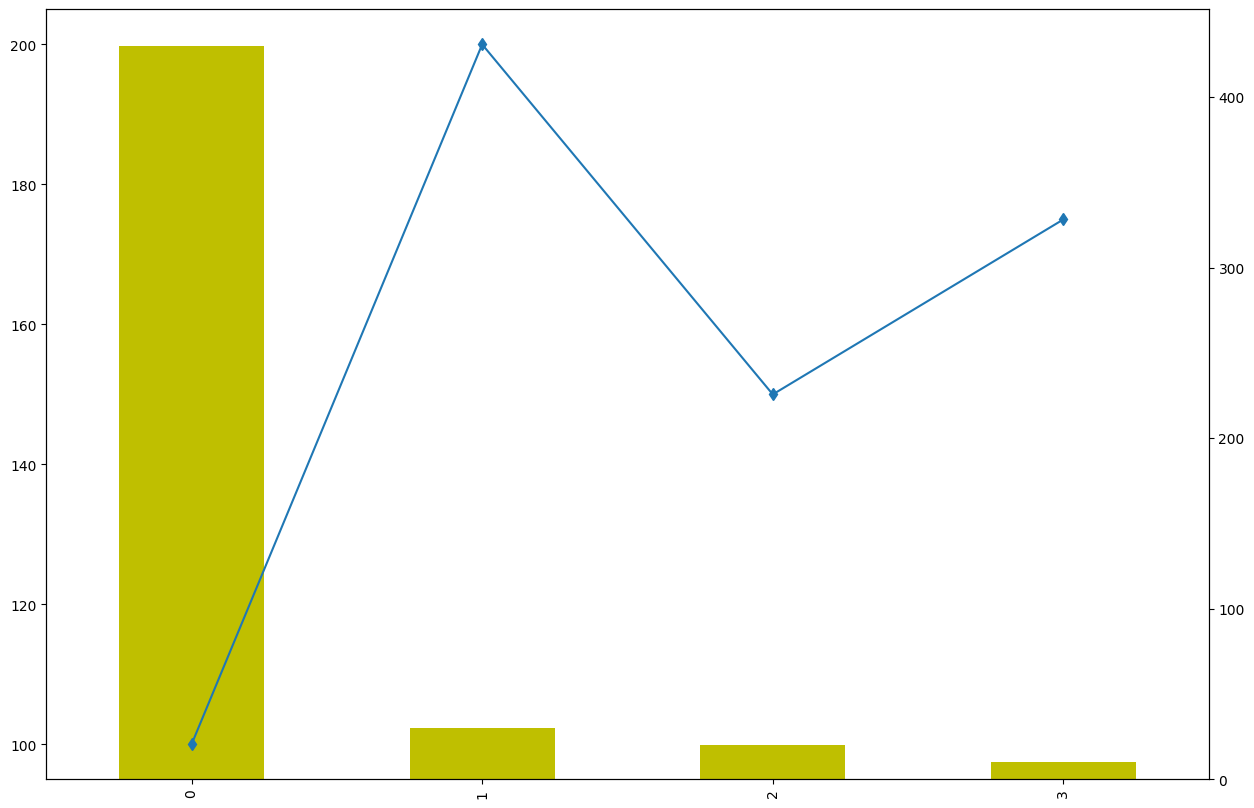

In [44]:
# feat_imp = []
# feature_imp = my_model.feature_importances_
# for idx, feature in enumerate(features):
#     feat_imp.append({"feature": feature, "importance": feature_imp[idx] })
# feat_imp

In [45]:
# sorted(feat_imp, key=lambda d: d['importance'], reverse=True)

In [46]:
train_X = train_df[[*features_with_season,*acti_features]]
train_Y = train_df[target]

In [47]:
model3 = XGBRegressor(n_estimators=final_params["n_estimators"], max_depth=final_params["max_depth"],learning_rate=final_params["learning_rate"],min_child_weight=final_params["min_child_weight"],objective= 'reg:squarederror',)
model3.fit(train_X, train_Y, verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=400, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [48]:
test_X = test_df[[*features_with_season,*acti_features]]
test_Y = test_df[target]

In [49]:
train_pred = model3.predict(train_X)
predictions = model3.predict(test_X)
scores = calculate_scores(train_Y, train_pred, scores, 'model3_train')
calculate_scores(test_Y, predictions, scores, 'model3_test')
scores_df = pd.DataFrame(scores)
scores_df

,Metric_Name,Value
0,model1_train_mse,0.088208
1,model1_train_mae,0.086380
2,model1_train_kappa,0.920886
3,model1_test_mse,0.658759
4,model1_test_mae,0.505474
5,model1_test_kappa,0.290949
6,model2_train_mse,0.123857
7,model2_train_mae,0.122943
8,model2_train_kappa,0.886792
9,model2_test_mse,0.600365


In [62]:
train_mse = scores_df[scores_df['Metric_Name'].str.contains('train_mse')]['Value'].to_list()
train_kappa = scores_df[scores_df['Metric_Name'].str.contains('train_kappa')]['Value'].to_list()
train_mse,train_kappa

([0.08820840950639854, 0.12385740402193784, 0.11791590493601463],
 [0.9208861684373499, 0.8867924672394872, 0.8930500654767679])

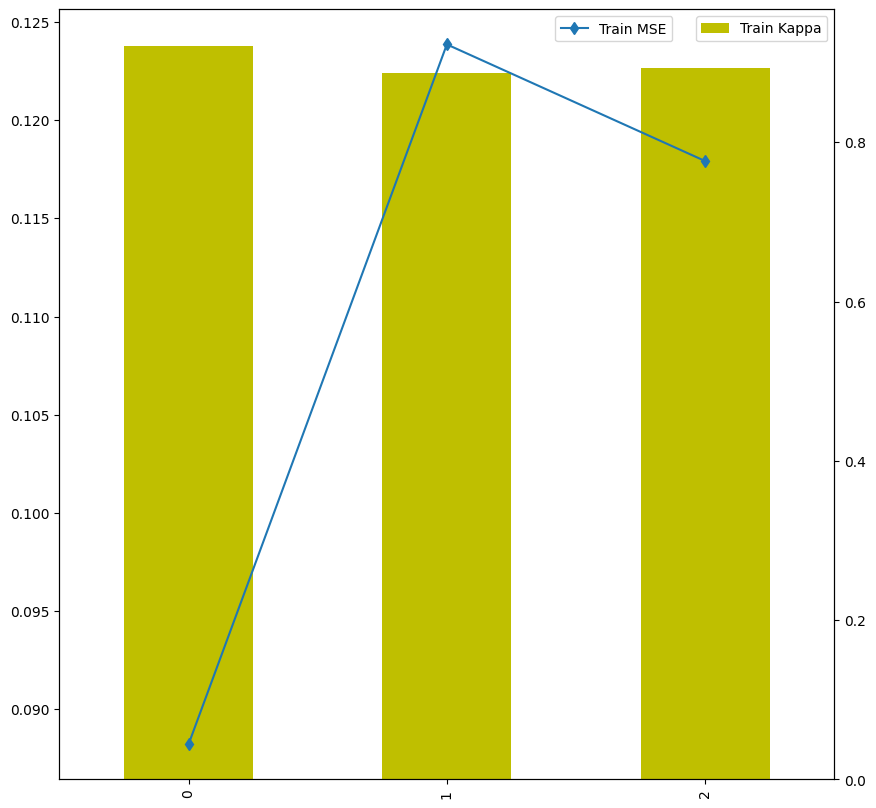

In [89]:
plotdf = pd.DataFrame({'a': train_mse,
                   'b': train_kappa})
fig, ax1 = plt.subplots(figsize=(10, 10))
ax2 = ax1.twinx()
plotdf['b'].plot(kind='bar', color='y', ax=ax1,label='Train Kappa')
plotdf['a'].plot(kind='line', marker='d', ax=ax2,label='Train MSE')
ax1.yaxis.tick_right()
ax2.yaxis.tick_left()
ax1.legend(loc='upper right')
ax2.legend(loc='upper right',bbox_to_anchor=(0.8, 1))


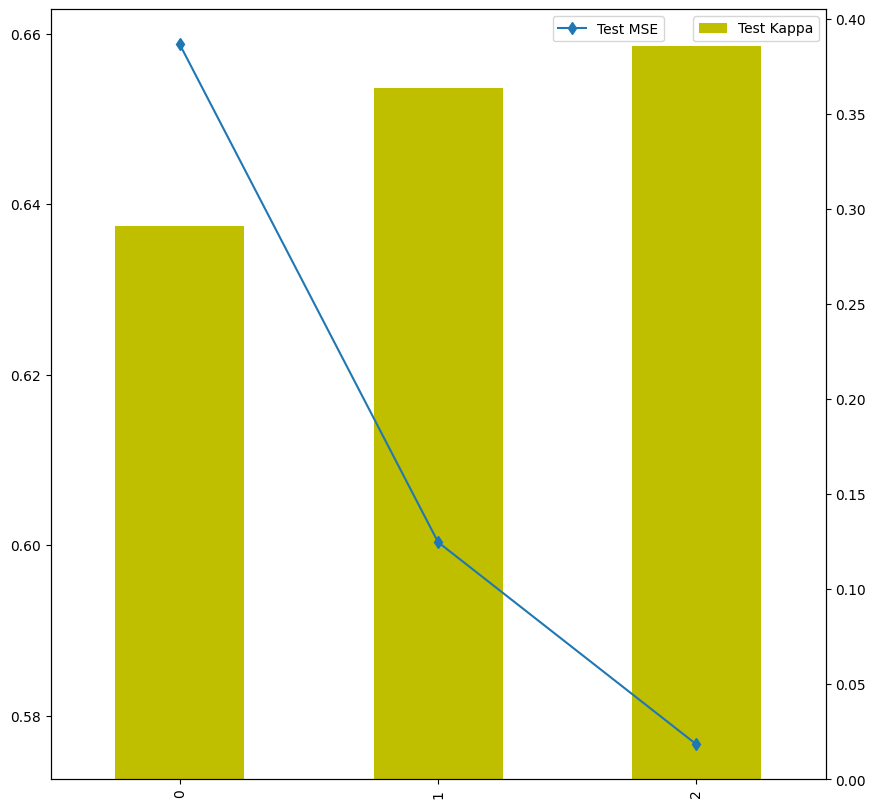

In [87]:
plotdf = pd.DataFrame({'a': test_mse,
                   'b': test_kappa})
fig, ax1 = plt.subplots(figsize=(10, 10))
ax2 = ax1.twinx()
plotdf['b'].plot(kind='bar', color='y', ax=ax1,label='Test Kappa')
plotdf['a'].plot(kind='line', marker='d', ax=ax2,label='Test MSE')
ax1.yaxis.tick_right()
ax2.yaxis.tick_left()
ax1.legend(loc='upper right')
ax2.legend(loc='upper right',bbox_to_anchor=(0.8, 1))

In [63]:
test_mse = scores_df[scores_df['Metric_Name'].str.contains('test_mse')]['Value'].to_list()
test_kappa = scores_df[scores_df['Metric_Name'].str.contains('test_kappa')]['Value'].to_list()
test_mse,test_kappa

([0.6587591240875912, 0.6003649635036497, 0.5766423357664233],
 [0.2909492337027426, 0.36345662274569623, 0.38573739322909284])

In [ ]:
# scores_for_plot = pd.read_csv("/kaggle/input/scores-for-plot/scores.csv")
# scores_for_plot = scores_for_plot.drop("idx", axis=1)
# scores_for_plot

In [ ]:
# final_scores = pd.concat([scores_for_plot, scores_df])
# final_scores

In [ ]:
# final_scores[final_scores['Metric_Name'].str.contains('train_mse')].plot(kind='bar',
#         x='Metric_Name',
#         y='Value',
#         color='red')

In [ ]:
# final_scores[final_scores['Metric_Name'].str.contains('test_mse')].plot(kind='bar',
#         x='Metric_Name',
#         y='Value',
#         color='blue')

In [ ]:
# final_scores[final_scores['Metric_Name'].str.contains('train_kappa')].plot(kind='bar',
#         x='Metric_Name',
#         y='Value',
#         color='red')

In [ ]:
# final_scores[final_scores['Metric_Name'].str.contains('train_kappa')].plot(kind='bar',
#         x='Metric_Name',
#         y='Value',
#         color='blue')

In [ ]:
scores_df

In [ ]:
# mse_score = final_scores[final_scores['Metric_Name'].str.contains('mse')]
# x = np.array([1, 2, 3, 4])  # X-axis points
# y = final_scores[final_scores['Metric_Name'].str.contains('mse')]

# plt.plot(x, y)  # Plot the chart
# plt.show()  # display

In [ ]:
df_test = pd.read_csv("/kaggle/input/child-mind-institute-problematic-internet-use/test.csv")
df_test

In [ ]:
df_test.shape[0]
# df_test['mean_x'] = [np.nan]*df_test.shape[0]
# df_test['mean_y'] = [np.nan]*df_test.shape[0]
# df_test['mean_z'] = [np.nan]*df_test.shape[0]
# df_test['mean_step'] = [np.nan]*df_test.shape[0]
df_test['mean_enmo'] = [np.nan]*df_test.shape[0]
# df_test['mean_anglez'] = [np.nan]*df_test.shape[0]
df_test['mean_light'] = [np.nan]*df_test.shape[0]
# df_test['mean_battery'] = [np.nan]*df_test.shape[0]
df_test

In [ ]:
for id in df_test.id.unique():
    file_path = f"/kaggle/input/child-mind-institute-problematic-internet-use/series_test.parquet/id={id}/part-0.parquet"
    if os.path.exists(file_path):
#         print(file_path)
        dfp = pd.read_parquet(file_path)
        dfp = dfp[dfp["non-wear_flag"] <= 0.2]
        # df_test.loc[df_test.id == id, "mean_x"] = dfp["X"].mean()
        # df_test.loc[df_test.id == id, "mean_y"] = dfp["Y"].mean()
        # df_test.loc[df_test.id == id, "mean_z"] = dfp["Z"].mean()
        # df_test.loc[df_test.id == id, "mean_step"] = dfp["step"].mean()
        df_test.loc[df_test.id == id, "mean_enmo"] = dfp["enmo"].mean()
        # df_test.loc[df_test.id == id, "mean_anglez"] = dfp["anglez"].mean()
        df_test.loc[df_test.id == id, "mean_light"] = dfp["light"].mean()
        # df_test.loc[df_test.id == id, "mean_battery"] = dfp["battery_voltage"].mean()

In [ ]:
df_test

In [ ]:
# df_test = pd.get_dummies(df_test, columns=categorical_features, dtype='int')
# df_test

In [ ]:
test_columns = df_test.columns
not_found_columns = [feature for feature in [*features,*acti_features] if feature not in test_columns]
for column in not_found_columns:
    df_test[column] = [np.nan]*df_test.shape[0]

test_X = df_test[[*features,*acti_features]]
test_X
# test_Y = df_test[target]

In [ ]:
predictions = my_model.predict(test_X)
predictions
# from sklearn.metrics import mean_absolute_error
# print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_y)))

In [ ]:
sii_result = [convert_PCIAT_to_SII(x) for x in predictions]
sii_result

In [ ]:
submission = pd.DataFrame({
        'id': df_test['id'],
        'sii': sii_result
    })
submission

In [ ]:
submission.to_csv('submission.csv', index=False)